# Постоянная Капрекара



Для 4-х значных чисел верна следующая схема действий:
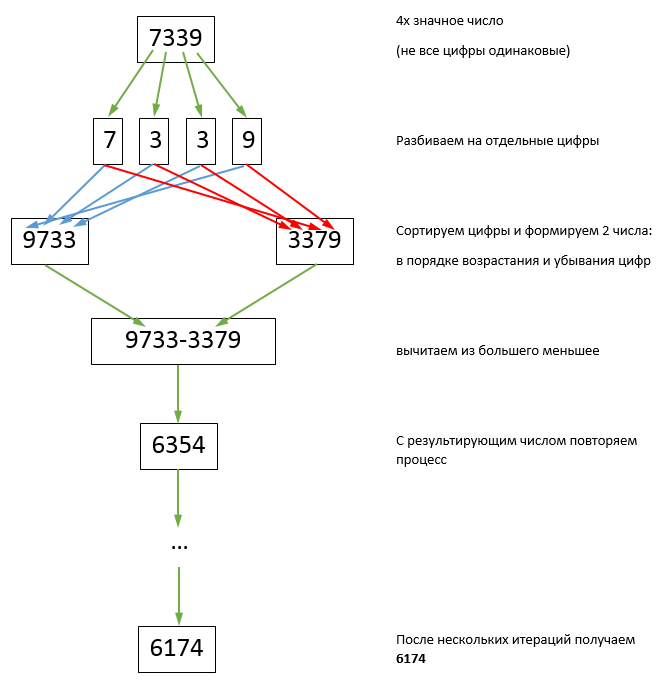
При этом легко заметить, что само число 6174 в результате такой операции превращается в себя же:
6174 → 6, 1, 7, 4 → 7641 - 1467 = 6174

Конечных постоянных Капрекара (таких, которые в результате процесса переходят сами в себя) известно 4: 495, 6174, 549945, 631764.

Для некоторых 6-значных чисел возможно не будет найдена постоянная Капрекара, но процесс "зациклится", т.е. одни и те же числа будут получаться по кругу.

In [3]:
# получить список цифр числа с повторениямиЮ порядок сохраняется, но строго говоря это не обязательно
def numerics(n):
    return [int(x) for x in str(n)]

In [4]:
# итеративный шаг в нахождении постоянной - сортируем цифры по возрастанию и убыванию, получаем 2 числа.
# из большего вычитаем меньшее
def kaprekar_step(num):
    num.sort()
    a = int("".join(list(map(str, num))))
    b = int("".join(list(map(str, num[::-1]))))
    return b - a if b > a else a - b

In [5]:
# проверка возможности нахождения такого числа
# 1. должно быть хотябы 2 разных цифры
# 2. число не должно равняться или быть меньше 100, 1.000, 1.000.000, 
# если ищем соответственно 3, 4 и 6 значную постоянную Капрекара 
def kaprekar_check(n):
    nums = numerics(n)
    if len(nums) not in [3, 4, 6]:
        return False
    if n <= 10**(len(nums) - 1):
        return False
    if len(set(nums)) == 1:
        return False
    return True

In [6]:
# итоговый алгоритм нахождения постоянной
def kaprekar_loop(n):
    if kaprekar_check(n) == False:
        print("Ошибка! На вход подано число "+str(n)+", не удовлетворяющее условиям процесса Капрекара")
        return
    steps = [n]
    print(n)
    while n not in [495, 6174, 549945, 631764]:
        step_n = kaprekar_step(numerics(n))
        if step_n in steps:
            print("Следующее число - "+str(step_n)+", кажется процесс зациклился...")
            return
        
        print(step_n)
        steps.append(step_n)
        #print(steps)
        n = step_n
        
    return n

## Тестирование

In [7]:
kaprekar_loop(99)

Ошибка! На вход подано число 99, не удовлетворяющее условиям процесса Капрекара


In [8]:
kaprekar_loop(100)

Ошибка! На вход подано число 100, не удовлетворяющее условиям процесса Капрекара


In [9]:
kaprekar_loop(101)

101
99
0
Следующее число - 0, кажется процесс зациклился...


In [10]:
kaprekar_loop(123)

123
198
792
693
594
495


495

In [11]:
kaprekar_loop(1000)

Ошибка! На вход подано число 1000, не удовлетворяющее условиям процесса Капрекара


In [12]:
kaprekar_loop(1234)

1234
3087
8352
6174


6174

In [13]:
kaprekar_loop(999998888)

Ошибка! На вход подано число 999998888, не удовлетворяющее условиям процесса Капрекара
